<a href="https://colab.research.google.com/github/Mrcold2002/colab_code/blob/main/%E2%80%9C%E6%AC%A2%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 导入试验所需的包

In [3]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random

2 生成数据集合

In [4]:
num_inputs=2 #输入参数两个
num_examples=1000 # 共1000个数据
true_w=[2,-3.4]
true_b=4.2  # 真实参数
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs)) # 正态分布的数据
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b # 真实标签
labels+=nd.random.normal(scale=0.01,shape=labels.shape) # 给正态分布的随机误差

In [5]:
features[0],labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>, 
 [6.000587]
 <NDArray 1 @cpu(0)>)

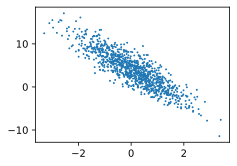

In [8]:
def use_svg_display():
  #用矢量图显示
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  # 设置图的尺寸
  plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);#加分号只显示图


3 读取数据集

In [9]:
def data_iter(batch_size,features,labels):
  # 该函数每次返回batch_size大小的随机样本的特征和标签
  num_examples=len(features)
  indices=list(range(num_examples))
  random.shuffle(indices)# 样本的读取顺序是随机的
  for i in range(0,num_examples,batch_size):
    j = nd.array(indices[i:min(i+batch_size,num_examples)])
    yield features.take(j),labels.take(j)#take函数根据索引返回对应函数

In [11]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
  print(X,y)
  break


[[-0.4295941  -1.3485998 ]
 [-0.00972697  0.28969124]
 [ 0.6996008   0.26840162]
 [ 0.18467532  0.60990727]
 [ 1.0637976  -1.2535169 ]
 [ 0.9509561   0.06745205]
 [-0.40336287  1.411676  ]
 [-0.2406694   1.6854812 ]
 [-0.22558607 -0.20714636]
 [-0.10980018 -0.43571743]]
<NDArray 10x2 @cpu(0)> 
[ 7.912276   3.1917932  4.682665   2.5009644 10.583371   5.8650117
 -1.4011718 -2.0056067  4.4466467  5.450973 ]
<NDArray 10 @cpu(0)>


4 初始化模型参数

FileNotFoundError: ignored